
The objective of this is to understand which parameters play an important role in the influence of the feedback of the passengers towards a positive scale. Test data that contain travel data and passenger survey data are provided. Both test data and train data are collected at the same time and belong to the same company.
> As a data analyst, I must predict whether a passenger was delighted taking into account his general travel experience in Shinkansen (bullet train). For each passenger identification in the testing set, the "Overal_Experience" level must predict.

### Data set
The problem consists of 2 separate data sets: travel data and survey data. The travel data has information related to the passengers and the performance of the train in which they traveled. The survey data are the aggregate data of the surveys collected after the service in the service. It is expected that both data sets such as without processing and perform the necessary cleaning or validation steps as necessary.

### Metric by measuringYour score is the percentage of all correct predictions made by you. This is known simply as precision. The best precision is 1, while the worst is 0. It will be calculated as the total number of two correct predictions (true positive + true negative) divided by the total number of observations in the data set.
### Shipping file format:
You must send a CSV file with exactly 35602 entries plus a row of heading.The file must have exactly two columns
• ID (ordered in any order)• Overall_Experience (contains 0 and 1, 1 represents delighted)

### Work with dataThe data has been divided into two groups and provided in the module:• Training data set1. Traveldata_train_ (1) .csv2. Surveydata_train_ (1) .csv• Test data set1. Traveldata_test.csv2. Surveydata_test.csv
The training set is used to create the automatic learning model. For the training set, we provide the overall_experience level for each participant.
The test set should be used to see how well your model works in un view. For the set of evidence, it is your work to predict the level of "general experience" for each participant.
Dictionary of dataAll data explain for themselves. The survey levels are explained in the Data Dictionary file.

In [1]:
# We will begin to load the necessary libraries of Python# Libraries to manipulate the dataimport numpy as np
import pandas as pd
# Libraries for data viewing as graphicsimport matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# We load the training data (train) and test (test) file surveydata, which was provided to usdf_train = pd.read_csv('Surveydata_train_(1).csv')
df_test = pd.read_csv('Surveydata_test.csv')

In [9]:
# We show the first 5 rows of the training data set (Train), with the Head Methoddf_train.head()

,ID,Overall_Experience,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,98800001,0,need improvement,Green Car,excellent,excellent,very convinient,good,need improvement,acceptable,need improvement,need improvement,acceptable,need improvement,good,need improvement,poor
1,98800002,0,poor,Ordinary,excellent,poor,need improvement,good,poor,good,good,excellent,need improvement,poor,need improvement,good,good
2,98800003,1,need improvement,Green Car,need improvement,need improvement,need improvement,need improvement,good,excellent,excellent,excellent,excellent,excellent,good,excellent,excellent
3,98800004,0,acceptable,Ordinary,need improvement,NaN,need improvement,acceptable,need improvement,acceptable,acceptable,acceptable,acceptable,acceptable,good,acceptable,acceptable
4,98800005,1,acceptable,Ordinary,acceptable,acceptable,manageable,need improvement,good,excellent,good,good,good,good,good,good,good


In [10]:
# We show the first 5 rows of the preuba data set (test), with the Head methoddf_test.head()

,ID,Seat_comfort,Seat_Class,Arrival_time_convenient,Catering,Platform_location,Onboardwifi_service,Onboard_entertainment,Online_support,Onlinebooking_Ease,Onboard_service,Leg_room,Baggage_handling,Checkin_service,Cleanliness,Online_boarding
0,99900001,acceptable,Green Car,acceptable,acceptable,manageable,need improvement,excellent,good,excellent,excellent,excellent,excellent,good,excellent,poor
1,99900002,extremely poor,Ordinary,good,poor,manageable,acceptable,poor,acceptable,acceptable,excellent,acceptable,good,acceptable,excellent,acceptable
2,99900003,excellent,Ordinary,excellent,excellent,very convinient,excellent,excellent,excellent,need improvement,need improvement,need improvement,need improvement,good,need improvement,excellent
3,99900004,acceptable,Green Car,excellent,acceptable,very convinient,poor,acceptable,excellent,poor,acceptable,need improvement,excellent,excellent,excellent,poor
4,99900005,excellent,Ordinary,extremely poor,excellent,need improvement,excellent,excellent,excellent,excellent,NaN,acceptable,excellent,excellent,excellent,excellent


In [37]:
# With Shape we observe the amount of rows and columns of the training file (Train)df_train.shape

(94379, 71)

- The training file (Train) has 94379 rows and 71 columns

In [38]:
# With Shape we observe the number of rows and columns of the test file (test)df_test.shape

(35602, 65)

- The test file (test) has 35602 rows and 65 columns

In [11]:
# We show how the counting of the Overall Experience column in training data is distributed# With the Method Value_Couts we show this countdf_train['Overall_Experience'].value_counts()

1    51593
0    42786
Name: Overall_Experience, dtype: int64

- The Experience Overall column has an amount of 51593 for number 1 (delighted) and a 42786 number forUsers who are not delighted or satisfied. It is a little more than 50% that are delighted.

### We check the data types of the variables

In [14]:
# With the info command we show the data type in the variables or columns of the training file (Train)df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_time_convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_location        94349 non-null  object
 7   Onboardwifi_service      94349 non-null  object
 8   Onboard_entertainment    94361 non-null  object
 9   Online_support           94288 non-null  object
 10  Onlinebooking_Ease       94306 non-null  object
 11  Onboard_service          86778 non-null  object
 12  Leg_room                 94289 non-null  object
 13  Baggage_handling         94237 non-null  object
 14  Checkin_service          94302 non-nul

- The training file (Train) has two whole columns (INT64) that are ID and Overall_Experience, all the other columnsThey are object type.

In [15]:
# With the info command we show the data type in the variables or columns of the test file (test)df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35602 entries, 0 to 35601
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       35602 non-null  int64 
 1   Seat_comfort             35580 non-null  object
 2   Seat_Class               35602 non-null  object
 3   Arrival_time_convenient  32277 non-null  object
 4   Catering                 32245 non-null  object
 5   Platform_location        35590 non-null  object
 6   Onboardwifi_service      35590 non-null  object
 7   Onboard_entertainment    35594 non-null  object
 8   Online_support           35576 non-null  object
 9   Onlinebooking_Ease       35584 non-null  object
 10  Onboard_service          32730 non-null  object
 11  Leg_room                 35577 non-null  object
 12  Baggage_handling         35562 non-null  object
 13  Checkin_service          35580 non-null  object
 14  Cleanliness              35600 non-nul

- The test file (test) has an integer column (int64) that is ID and Overall_Experience, all the other columnsThey are object type.

### Verification of null values

In [16]:
# We verify if there are null values ​​in training data (Train)# With the ISNULL and SUM methods we verify if there are null valuesdf_train.isnull().sum()

ID                            0
Overall_Experience            0
Seat_comfort                 61
Seat_Class                    0
Arrival_time_convenient    8930
Catering                   8741
Platform_location            30
Onboardwifi_service          30
Onboard_entertainment        18
Online_support               91
Onlinebooking_Ease           73
Onboard_service            7601
Leg_room                     90
Baggage_handling            142
Checkin_service              77
Cleanliness                   6
Online_boarding               6
dtype: int64

- There are many null data in the training file (Train), but there are more null values ​​in the columns ofArrival_time_convenient, catering and onboard_service. The other columns although they have null values, given the amount ofData throughout the file is not of great consideration.

In [17]:
# We verify if there are null values ​​in the test data (test)# With the ISNULL and SUM methods we verify if there are null valuesdf_test.isnull().sum()

ID                            0
Seat_comfort                 22
Seat_Class                    0
Arrival_time_convenient    3325
Catering                   3357
Platform_location            12
Onboardwifi_service          12
Onboard_entertainment         8
Online_support               26
Onlinebooking_Ease           18
Onboard_service            2872
Leg_room                     25
Baggage_handling             40
Checkin_service              22
Cleanliness                   2
Online_boarding               2
dtype: int64

- Like the training file (Train) the test file (test), has many null values.There are also more null values ​​in the columns of Arrival_time_convenient, catering and onboard_service.

In [43]:
# We are# With the duplicated and sum command we verify thisdf_train.duplicated().sum()

0

In [44]:
# We are# With the duplicated and sum command we verify thisdf_test.duplicated().sum()

0

- There are no duplicate values ​​in training files (Train) and Test (Test)

### Imputation of categorical values

### Lost value treatment
* We will use the fashion value to impute the missing values ​​in the arrival_hora_ -wing, catering and service on board columns. (Because they are the columns with too many lost data, the other columns have lost values ​​but not large amounts to be considered for imputation.

In [46]:
df_train.loc[df_train['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_train['Arrival_time_convenient'].mode()[0]
df_test.loc[df_test['Arrival_time_convenient'].isnull() == True,'Arrival_time_convenient'] = df_train['Arrival_time_convenient'].mode()[0]

df_train.loc[df_train['Catering'].isnull() == True,'Catering'] = df_train['Catering'].mode()[0]
df_test.loc[df_test['Catering'].isnull() == True,'Catering'] = df_train['Catering'].mode()[0]

df_train.loc[df_train['Onboard_service'].isnull() == True,'Onboard_service'] = df_train['Onboard_service'].mode()[0]
df_test.loc[df_test['Onboard_service'].isnull() == True,'Onboard_service'] = df_train['Onboard_service'].mode()[0]

### Delete unnecessary columns

In [48]:
# In our case the ID column both in the training file (Train) and test file (test) is not necessary# With the drop command the ID column is eliminateddf_train.drop('ID',axis = 1,inplace = True)
test_file_ids = df_test['ID'] ## necessary step
df_test.drop('ID',axis = 1,inplace = True)

### Codification of categorical values

In [49]:
# For training data (Train)df_train = pd.get_dummies(df_train,drop_first = True)
df_train.head()

,Overall_Experience,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Ordinary,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,...,Cleanliness_excellent,Cleanliness_extremely poor,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
2,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [50]:
# For test data (test)df_test = pd.get_dummies(df_test,drop_first = True)
df_test.head()

,Seat_comfort_excellent,Seat_comfort_extremely poor,Seat_comfort_good,Seat_comfort_need improvement,Seat_comfort_poor,Seat_Class_Ordinary,Arrival_time_convenient_excellent,Arrival_time_convenient_extremely poor,Arrival_time_convenient_good,Arrival_time_convenient_need improvement,...,Checkin_service_poor,Cleanliness_excellent,Cleanliness_good,Cleanliness_need improvement,Cleanliness_poor,Online_boarding_excellent,Online_boarding_extremely poor,Online_boarding_good,Online_boarding_need improvement,Online_boarding_poor
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [51]:
# We create a variable name Col to save all the columns of the training file (Train)cols = df_train.columns

### Imputation of continuous values

In [52]:
# In our case it is the SEAT_Comfort_Excelent column for both training files (Train) and Test (Test)from sklearn.impute import SimpleImputer
SI = SimpleImputer(strategy='median')
df_train = SI.fit_transform(df_train)
df_train = pd.DataFrame(df_train,columns=cols)

df_test.loc[df_test['Seat_comfort_excellent'].isnull() == True,'Seat_comfort_excellent'] = df_train['Seat_comfort_excellent'].median()

In [53]:
# We verify that no column has missing values ​​in the training sets (Train) and Test (Test)print(df_train.isna().sum())
print("-" * 30)
print(df_test.isna().sum())
print("-" * 30)

Overall_Experience                  0
Seat_comfort_excellent              0
Seat_comfort_extremely poor         0
Seat_comfort_good                   0
Seat_comfort_need improvement       0
                                   ..
Online_boarding_excellent           0
Online_boarding_extremely poor      0
Online_boarding_good                0
Online_boarding_need improvement    0
Online_boarding_poor                0
Length: 71, dtype: int64
------------------------------
Seat_comfort_excellent              0
Seat_comfort_extremely poor         0
Seat_comfort_good                   0
Seat_comfort_need improvement       0
Seat_comfort_poor                   0
                                   ..
Online_boarding_excellent           0
Online_boarding_extremely poor      0
Online_boarding_good                0
Online_boarding_need improvement    0
Online_boarding_poor                0
Length: 65, dtype: int64
------------------------------


- It is observed that there are no longer null values ​​in the columns in both training files (train) and test (test)

### We divide the training data set into a training and validation set

In [54]:
# As the variable or column is mentioned as a requirement, it is overall_experienceX = df_train.drop(['Overall_Experience'],axis = 1)
y = df_train['Overall_Experience']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.2,random_state = 0)

### training the models - Decision Tree

In [56]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=0)
dt_model.fit(X_train,y_train)

y_pred_train = dt_model.predict(X_train)
y_pred_val = dt_model.predict(X_validation)

In [57]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Entrenamiento Accuracy:",dt_acc_train)
print("Validacion Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Entrenamiento  ROC AUC:",dt_roc_train)
print("Validacion ROC AUC :",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Informe de clasificación de Entrenamiento:\n",dt_clr_train)
print("Informe de clasificación de Validacion:\n",dt_clr_val)

Entrenamiento Accuracy: 0.9184005933539064
Validacion Accuracy: 0.9068128840856113

Entrenamiento  ROC AUC: 0.9207321308051453
Validacion ROC AUC : 0.9089581521318065

Informe de clasificación de Entrenamiento:
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     34169
         1.0       0.95      0.90      0.92     41334

    accuracy                           0.92     75503
   macro avg       0.92      0.92      0.92     75503
weighted avg       0.92      0.92      0.92     75503

Informe de clasificación de Validacion:
               precision    recall  f1-score   support

         0.0       0.87      0.93      0.90      8617
         1.0       0.94      0.88      0.91     10259

    accuracy                           0.91     18876
   macro avg       0.91      0.91      0.91     18876
weighted avg       0.91      0.91      0.91     18876



### training the models - Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=10,criterion='gini',max_depth=10,random_state=0)
rf_model.fit(X_train,y_train)

y_pred_train = rf_model.predict(X_train)
y_pred_val = rf_model.predict(X_validation)

In [59]:
from sklearn import metrics
dt_acc_train = metrics.accuracy_score(y_train,y_pred_train)
dt_acc_val = metrics.accuracy_score(y_validation,y_pred_val)
print("Entrenamiento Accuracy:",dt_acc_train)
print("Validacion Accuracy:",dt_acc_val)
print()

dt_roc_train = metrics.roc_auc_score(y_train,y_pred_train)
dt_roc_val = metrics.roc_auc_score(y_validation,y_pred_val)
print("Entrenamiento ROC AUC :",dt_roc_train)
print("Validacion ROC AUC :",dt_roc_val)
print()

dt_clr_train = metrics.classification_report(y_train,y_pred_train)
dt_clr_val = metrics.classification_report(y_validation,y_pred_val)
print("Informe de clasificación de Entrenamiento:\n",dt_clr_train)
print("Informe de clasificación de Validacion:\n",dt_clr_val)

Entrenamiento Accuracy: 0.9097784194005536
Validacion Accuracy: 0.9040050858232677

Entrenamiento ROC AUC : 0.9093770866368811
Validacion ROC AUC : 0.90345889212237

Informe de clasificación de Entrenamiento:
               precision    recall  f1-score   support

         0.0       0.90      0.91      0.90     34169
         1.0       0.92      0.91      0.92     41334

    accuracy                           0.91     75503
   macro avg       0.91      0.91      0.91     75503
weighted avg       0.91      0.91      0.91     75503

Informe de clasificación de Validacion:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      8617
         1.0       0.91      0.91      0.91     10259

    accuracy                           0.90     18876
   macro avg       0.90      0.90      0.90     18876
weighted avg       0.90      0.90      0.90     18876



### We predict test data using the RF model and create a shipping file that must be charged on the GL Hackathon platform

In [36]:
final_predictions = rf_model.predict(X_train)
submission=pd.DataFrame([test_file_ids,final_predictions]).T
submission.rename(columns={"Unnamed 0": "Overall_Experience"},inplace=True)
submission.to_csv('Shinkansen_Warriors_Bros_Fer_Guerrero.csv',index = False)

## Conclusions

- Clearly the best precision was not obtained that is a 1 in any model, but the closest is Accuracy.- It is necessary to improve quite a lot in the cleaning, seat and tribute variables on the part of the company.- The people who travel the most on the train (trains) are loyalty, that is, they already know the trains.- There is an important correlation between output delay in minutes and arrival delay in minutes.- There are more enchanted customers or travelers with 1 more or less 54 % than those who are not delighted.- There are more women than men who travel or use trains with 50.7 %, maybe that's why cleaning, quality ratingsIn the seats they have a (not delighted) with the service.- The average age of customers or travelers who use the train (s) is 40 years.

## Recommendations

- Ovbly it is recommended to put more emphasis and attention to cleaning, comfort and delay of trains so that usersThey can be more satisfied and recommend to the company to have more users.- It would be good to have a database or incorporate existing columns with costs and different regions to existing filesor destinations to make a more complete analysis and determine the cost-benefit of users.- Despite being a bullet train, its speed is not specified at any time or file, being important forAlso be able to make more recommendations and validate the delay against the arrival and that it is a parameter more in the analysis.- High speed must solve challenges such as tunnel pressure changes or air resistance, that data would beperfect to have it to see train behavior and see if there is improvement or not and be a plus for users and an exampleFor other trains and society companies.- Be the best transport option for users, in comfort, satisfaction be business trip or not.- Have an internal survey or internal control about why the train output delays in order to improve in thatitem.

## <a name = 'link2'> Summary of the Exploratory Data Analysis (EDA) </a>

### ** Note **: In this case study, we will focus mainly on the aspects of model construction. We will only see the training file (Surveydata_Train).

In [63]:
# Function to create bars diagrams labeled
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # longitud de la columna
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # porcentaje de cada clase de la categoría
        else:
            label = p.get_height()  # recuento de cada nivel de la categoría

        x = p.get_x() + p.get_width() / 2  # ancho del plot
        y = p.get_height()  # alto del plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # anotando el porcentaje

    plt.show()  # mostrar el plot

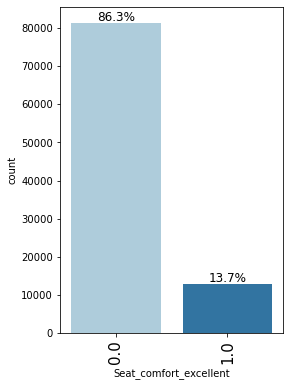

In [66]:
# We use Labeled_Barplot to graph seat_comfort_excelentlabeled_barplot(df_train,"Seat_comfort_excellent", perc=True)


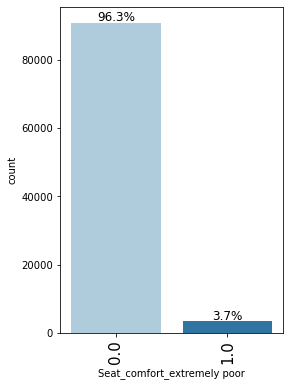

In [70]:
labeled_barplot(df_train, "Seat_comfort_extremely poor", perc=True)

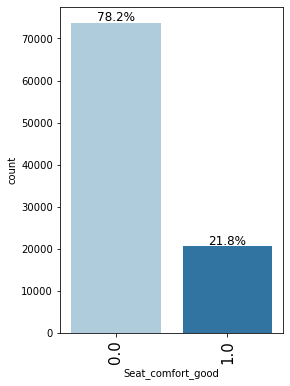

In [71]:
labeled_barplot(df_train, "Seat_comfort_good", perc=True)

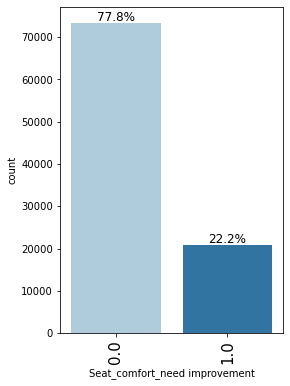

In [72]:
labeled_barplot(df_train, "Seat_comfort_need improvement", perc=True)

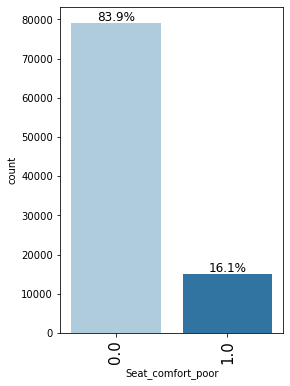

In [73]:
labeled_barplot(df_train, "Seat_comfort_poor", perc=True)

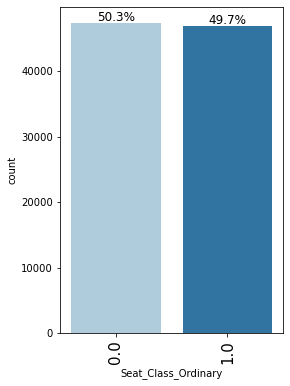

In [74]:
labeled_barplot(df_train, "Seat_Class_Ordinary", perc=True)

- All SEAT variables have a % of uncharged users or satisfied with the comfort of their seat

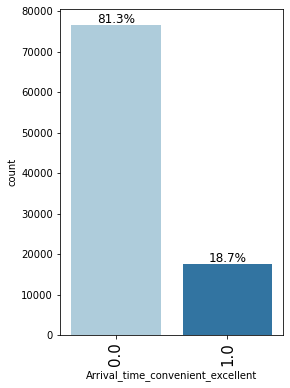

In [75]:
labeled_barplot(df_train, "Arrival_time_convenient_excellent", perc=True)

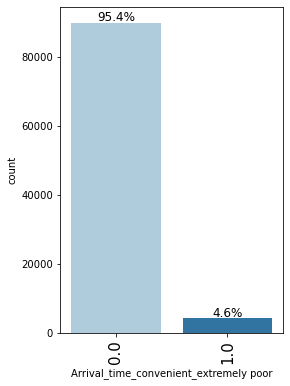

In [76]:
labeled_barplot(df_train, "Arrival_time_convenient_extremely poor", perc=True)

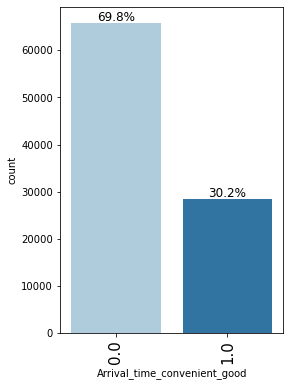

In [77]:
labeled_barplot(df_train, "Arrival_time_convenient_good", perc=True)

- All arrival variables have a % unchained users or satisfied with their arrival on time or convenient

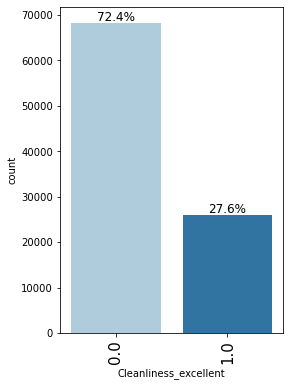

In [78]:
labeled_barplot(df_train, "Cleanliness_excellent", perc=True)

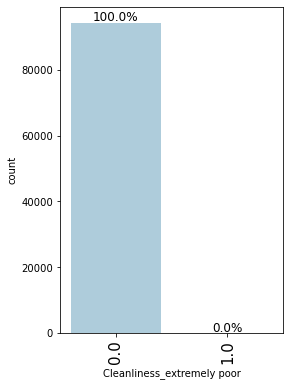

In [79]:
labeled_barplot(df_train, "Cleanliness_extremely poor", perc=True)

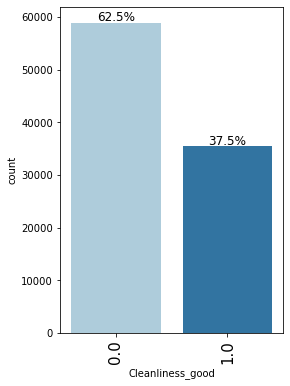

In [80]:

labeled_barplot(df_train, "Cleanliness_good", perc=True)

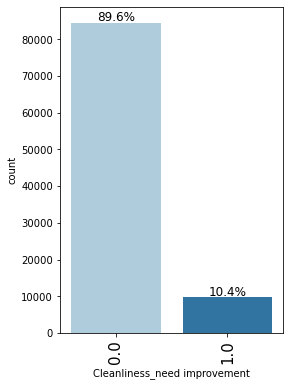

In [81]:
labeled_barplot(df_train, "Cleanliness_need improvement", perc=True)

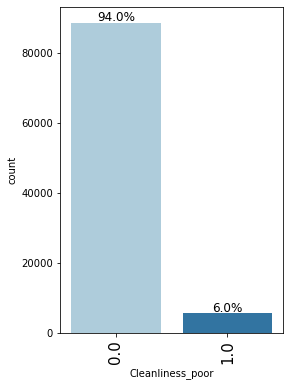

In [82]:
labeled_barplot(df_train, "Cleanliness_poor", perc=True)

- It is necessary to improve quite a lot in the cleanThey are not satisfied with cleaning

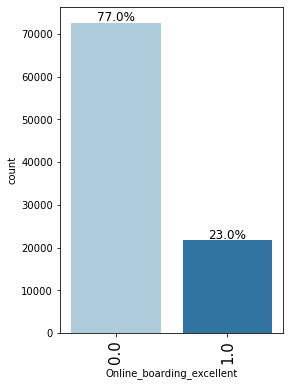

In [83]:
labeled_barplot(df_train, "Online_boarding_excellent", perc=True)

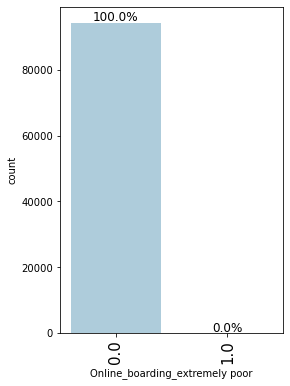

In [84]:
labeled_barplot(df_train, "Online_boarding_extremely poor", perc=True)

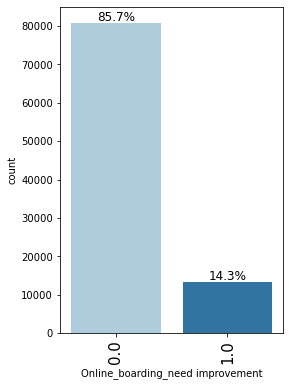

In [85]:
labeled_barplot(df_train, "Online_boarding_need improvement", perc=True)

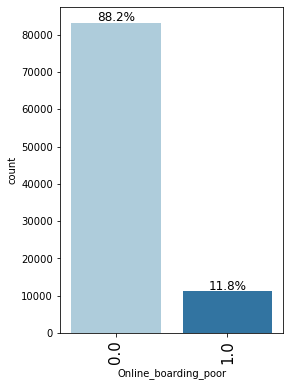

In [86]:
labeled_barplot(df_train, "Online_boarding_poor", perc=True)

- Online_boarding variables are well below user satisfaction.

### ** Note **: Let's see the training data of the Traveldata_Train file

In [89]:
# We load the file and put it in the data variabledata = pd.read_csv('Traveldata_train_(1).csv')

In [90]:
# We show the first 5 data of the Traveldata_Train filedata.head()

,ID,Gender,CustomerType,Age,TypeTravel,Travel_Class,Travel_Distance,DepartureDelay_in_Mins,ArrivalDelay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business travel,Business,1981,0.0,0.0


In [91]:
# We show the rows and columns of the Traveldata_Train filedata.shape

(94379, 9)

- It is 94379 rows and 9 columns the Traveldata_Train file

In [92]:
# We display the type of data from each column of the Traveldata_Train filedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      94379 non-null  int64  
 1   Gender                  94302 non-null  object 
 2   CustomerType            85428 non-null  object 
 3   Age                     94346 non-null  float64
 4   TypeTravel              85153 non-null  object 
 5   Travel_Class            94379 non-null  object 
 6   Travel_Distance         94379 non-null  int64  
 7   DepartureDelay_in_Mins  94322 non-null  float64
 8   ArrivalDelay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


- There are two columns with the type of data of int64 which is ID and Travel distances- There are 4 columns with the type of objection data and they are: Gender, Customertype, Typetravel, Travellass- There are 3 columns with the type of float data and they are: AGE, Departuredelay_in_min and Arrivaldelay_in_min_min

In [93]:
# Let's show the statistical variables of the Traveldata_Train training filedata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,94379.0,9.884719e+07,27245.014865,98800001.0,98823595.5,98847190.0,98870784.5,98894379.0
Age,94346.0,3.941965e+01,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1.978888e+03,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
DepartureDelay_in_Mins,94322.0,1.464709e+01,38.138781,0.0,0.0,0.0,12.0,1592.0
ArrivalDelay_in_Mins,94022.0,1.500522e+01,38.439409,0.0,0.0,0.0,13.0,1584.0


- The third quarter and the average of Travel_distance has a lot of difference

In [95]:
# Let's check if there are duplicate valuesdata.duplicated().sum()

0

- There are no null values ​​in the Traveldata_Train training file

In [96]:
# We verify if there are no null values ​​in the Traveldata_Train training filedata.isnull().sum()

ID                           0
Gender                      77
CustomerType              8951
Age                         33
TypeTravel                9226
Travel_Class                 0
Travel_Distance              0
DepartureDelay_in_Mins      57
ArrivalDelay_in_Mins       357
dtype: int64

- There are no null values ​​in just two columns that are: ID, Travel_class and Travel_DISTANCE; In all other columnsThere are lost or null values.

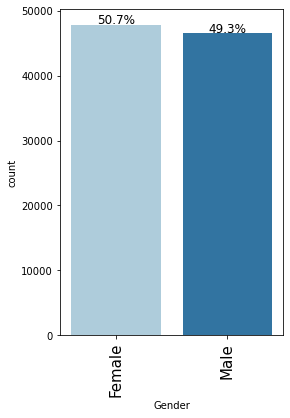

In [99]:
# We use the function defined in the previous step to graph "Gender"labeled_barplot(data, "Gender", perc=True) 

- Women travel a little more than men on the train or trains

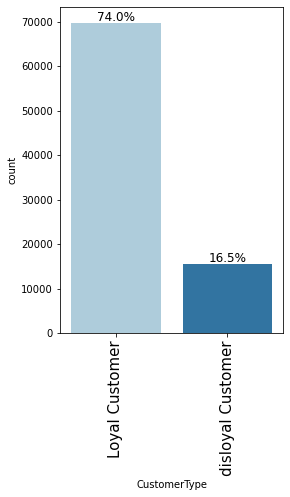

In [100]:
# We use the function defined in the previous step to graph "Customertype"labeled_barplot(data, "CustomerType", perc=True) 

- More loyal customers travel to the company than unfair.

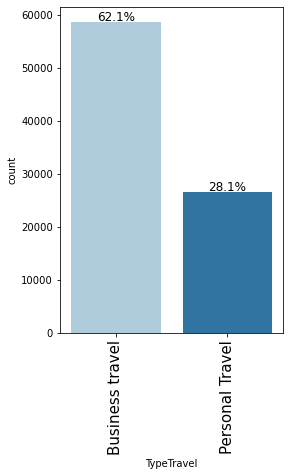

In [102]:
# We use the function defined in the previous step to graph "Typetravel"labeled_barplot(data, "TypeTravel", perc=True) 

- There are more business trips than pleasure or personal.

### Bivariate analysis

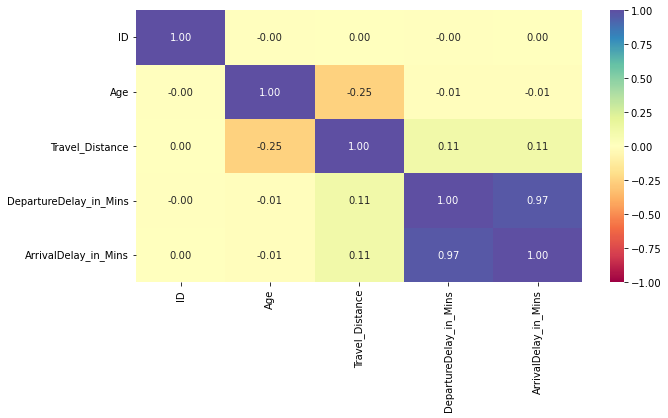

In [107]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) 
plt.show()

- Clearly it is seen that there is dependence between the variable departuredelay_in_min and arrivaldelay_in_min, having logicaThe more the departure the arrival will be more delayed.

### Checking of atypical values

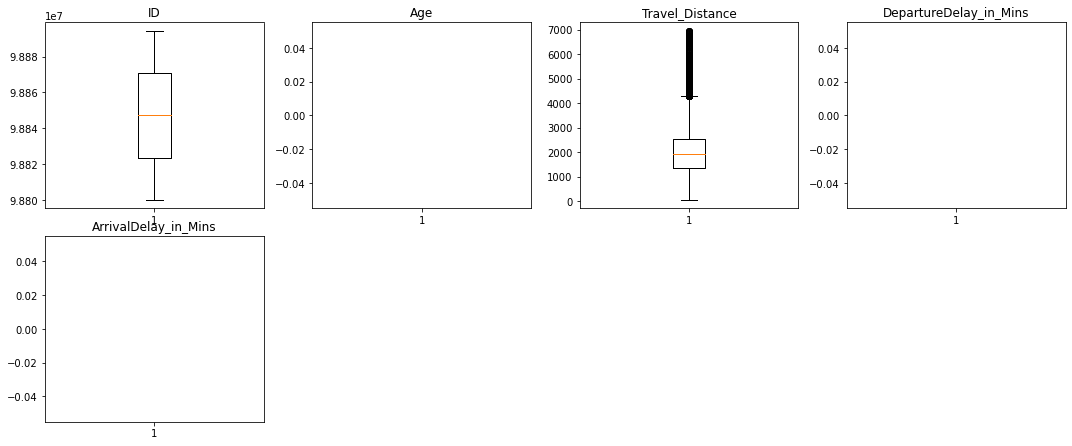

In [108]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

- No atypical values ​​are observed

In [2]:
datos = pd.read_csv('Shinkansen_Warriors_Bros_Fer_Guerrero.csv')

In [3]:
datos.isnull().sum()

ID                    0
Overall_Experience    0
dtype: int64